In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import klib as kb

In [2]:
df=pd.read_csv('ParisHousing.csv')

In [3]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [4]:
print(df.describe())

       squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024     

In [14]:
y=df.iloc[:,-1]

In [15]:
y

0       7559081.5
1       8085989.5
2       5574642.1
3       3232561.2
4       7055052.0
          ...    
9995     176425.9
9996    4448474.0
9997    8390030.5
9998    5905107.0
9999     146708.4
Name: price, Length: 10000, dtype: float64

In [18]:
x=df.drop('price',axis=1)

In [19]:
x

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4


In [20]:
sc= StandardScaler()

In [21]:
x=sc.fit_transform(x)

In [22]:
x

array([[ 0.89156241, -1.64351831, -1.01755405, ...,  1.53748782,
        -1.00601811,  0.63137326],
       [ 1.07395603, -0.39418009,  0.98274878, ..., -1.62237047,
         0.99401789, -0.9428096 ],
       [ 0.20303346,  0.26519286, -1.01755405, ..., -1.59565669,
         0.99401789,  1.26104641],
       ...,
       [ 1.18065352, -1.64351831, -1.01755405, ..., -0.79424336,
         0.99401789,  1.26104641],
       [ 0.31855868,  0.68163893, -1.01755405, ..., -0.81714088,
         0.99401789, -0.31313646],
       [-1.68318347,  1.16749268, -1.01755405, ..., -1.04993237,
         0.99401789,  0.31653669]])

In [23]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [24]:
model = LinearRegression()


In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
model.coef_


array([ 2.87729841e+06, -1.65666416e+00,  1.50643347e+03,  1.49283999e+03,
        1.57063026e+03, -2.44893577e+01,  1.53667100e+02, -8.88720615e+00,
       -1.05447701e+01,  5.64055765e+01,  6.44374242e+01, -4.24108740e-01,
       -2.34143190e+01,  2.98879740e+01,  5.00715477e+00, -2.94218750e+01])

In [27]:
model.intercept_

4993449.505271389

In [28]:
training_score = model.score(x_train,y_train)*100 #training
training_score

99.99995647424505

In [29]:
testing_score = model.score(x_test,y_test)*100 #testing
testing_score

99.9999566785081

In [30]:
R2_score = r2_score(y_test, model.predict(x_test))*100
R2_score

99.9999566785081

In [31]:
mae = mean_absolute_error(y_test, model.predict(x_test))
mae

1442.0677199315005

In [39]:
y_pred = model.predict(x)
y_pred

array([7559296.12296699, 8089247.35881144, 5575689.03126628, ...,
       8388790.22271051, 5909252.23944339,  147373.18613374])

In [33]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"), dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,7559081.5,7.559296e+06
1,8085989.5,8.089247e+06
2,5574642.1,5.575689e+06
3,3232561.2,3.232850e+06
4,7055052.0,7.054370e+06


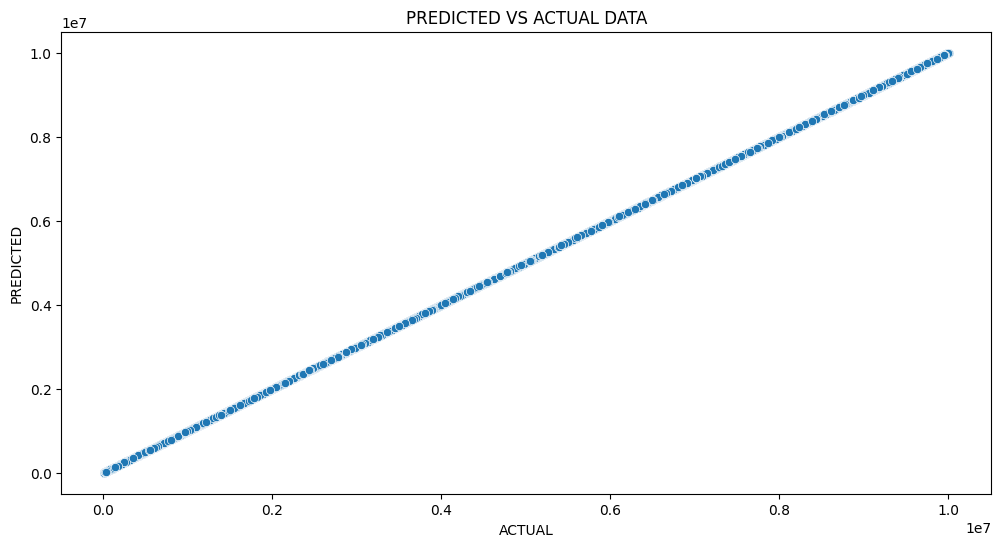

In [35]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");

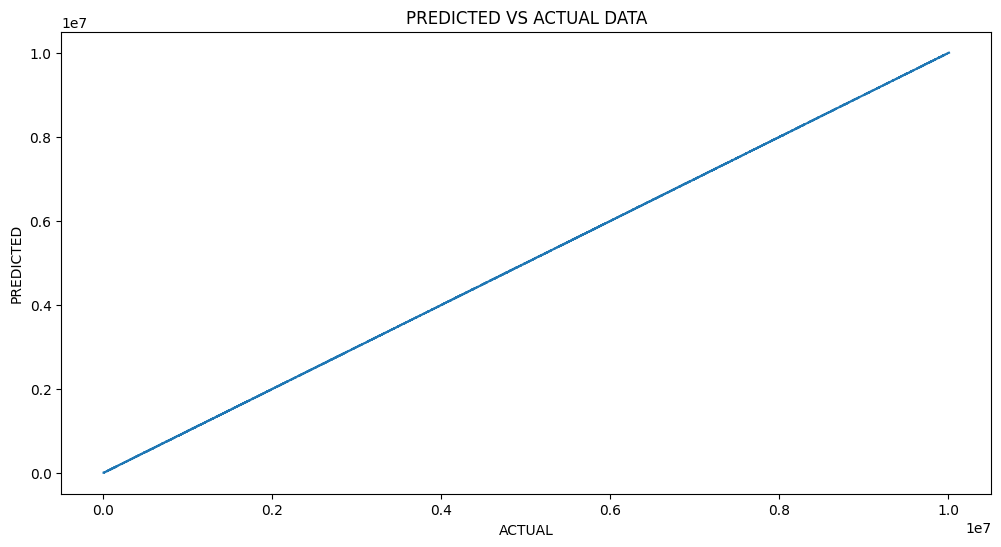

In [36]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");